- 存在于这个linear_model中，说明逻辑斯蒂回归和**线性回归**，有关系！！
- 逻辑斯蒂回归内部，是一个 **<span style="color:red">线性回归模型 + sigmoid函数</span>** ，进行概率的转化
- 概率 0 到 1 根据数字的大小，分类 设置阈值 < 0.5 甲类，大于等于 0.5 乙类
- 关键：逻辑斯蒂回归用于 **<span style="color:red">解决分类问题</span>**
- 逻辑斯蒂回归，名字虽然带着回归，不可以解决回归问题，它是一个 **<span style="color:red">分类算法</span>**
    - 老婆饼，没有老婆
    - 红烧狮子头，有狮子吗？

# 逻辑斯蒂回归使用

In [1]:
from sklearn.linear_model import LogisticRegression # 逻辑斯蒂回归
import numpy as np
import matplotlib.pyplot as plt

## sigmoid曲线绘制

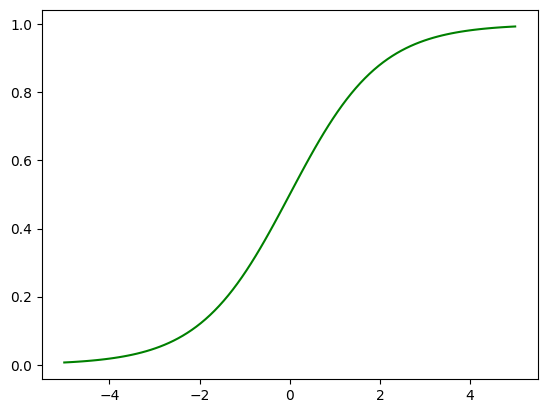

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-5,5,100)
y = sigmoid(x)
plt.plot(x,y,color = 'green')

## 逻辑斯蒂回归分类

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

#### 加载数据

In [4]:
X,y = load_iris(return_X_y=True)  # 直接返回数据
display(X.shape,y)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 拆分

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15) # 15%保留作为测试数据
display(X_train.shape,X_test.shape)

(127, 4)

(23, 4)

#### 建模

In [6]:
model = LogisticRegression(max_iter=1000) # 迭代次数，和梯度下降有关，默认的参数使100，没有拟合好，需要提升参数的次数

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### 预测

In [7]:
y_ = model.predict(X_test)
display('真实类别：',y_test)
display('算法预测：',y_)

'真实类别：'

array([2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       1])

'算法预测：'

array([2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       1])

In [8]:
model.score(X_test,y_test)

1.0

#### 概率

In [9]:
np.set_printoptions(suppress=True)

In [10]:
model.predict_proba(X_test)

array([[0.00000105, 0.00751981, 0.99247914],
       [0.00347166, 0.83781654, 0.1587118 ],
       [0.96082103, 0.0391789 , 0.00000007],
       [0.98939775, 0.01060224, 0.00000001],
       [0.00340845, 0.75756175, 0.2390298 ],
       [0.994406  , 0.005594  , 0.        ],
       [0.96702189, 0.03297805, 0.00000005],
       [0.98287189, 0.01712806, 0.00000005],
       [0.00000133, 0.00451192, 0.99548675],
       [0.98280219, 0.0171978 , 0.00000001],
       [0.9673646 , 0.03263535, 0.00000005],
       [0.00017286, 0.16866102, 0.83116612],
       [0.9827442 , 0.01725578, 0.00000002],
       [0.9606987 , 0.03930112, 0.00000018],
       [0.93900211, 0.06099743, 0.00000046],
       [0.01860549, 0.95109644, 0.03029807],
       [0.94273981, 0.05726005, 0.00000014],
       [0.00013317, 0.14763456, 0.85223227],
       [0.96896486, 0.03103504, 0.0000001 ],
       [0.97011615, 0.02988376, 0.00000009],
       [0.00000067, 0.0162064 , 0.98379293],
       [0.0110334 , 0.71123419, 0.27773241],
       [0.

#### 方程，线性回归方程

- 三个方程，三分类问题

In [11]:
w_ = model.coef_
w_

array([[-0.40162054,  0.92954456, -2.42052638, -1.04069857],
       [ 0.60538591, -0.32666083, -0.27603125, -0.82418735],
       [-0.20376536, -0.60288373,  2.69655763,  1.86488592]])

In [12]:
b_ = model.intercept_
b_

array([  9.36959828,   1.89145983, -11.26105811])

# 概率的计算

## 二分类

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = datasets.load_iris(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
cond = y != 2 # 将0和1筛选出来
cond

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [15]:
X = X[cond]
y = y[cond]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)
display(X.shape,X_train.shape,X_test.shape,y)

(100, 4)

(85, 4)

(15, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_ = model.predict(X_test)
print('算法预测：',y_)
print('真实结果：',y_test)

算法预测： [1 0 0 0 1 0 1 0 1 1 0 1 0 1 1]
真实结果： [1 0 0 0 1 0 1 0 1 1 0 1 0 1 1]


In [18]:
proba_ = model.predict_proba(X_test) # 算法计算的概率
proba_
# 第一列是类别 0 的概率，第二列是类别 1 的概率

array([[0.01161167, 0.98838833],
       [0.97763018, 0.02236982],
       [0.95145567, 0.04854433],
       [0.99455653, 0.00544347],
       [0.00429237, 0.99570763],
       [0.98501125, 0.01498875],
       [0.00412452, 0.99587548],
       [0.97747071, 0.02252929],
       [0.04093559, 0.95906441],
       [0.15533209, 0.84466791],
       [0.98216697, 0.01783303],
       [0.08877146, 0.91122854],
       [0.97514147, 0.02485853],
       [0.07619317, 0.92380683],
       [0.02503348, 0.97496652]])

In [19]:
proba_.argmax(axis = 1) # 找到最大值的索引，找列索引

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [20]:
model.predict(X_test)  # predict的内部就是调用了argmax来进行类别的输出

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

### 概率手动计算

In [21]:
w_ = model.coef_
b_ = model.intercept_
display(w_,b_)

array([[ 0.44029933, -0.79118695,  2.2067412 ,  0.93029916]])

array([-6.77778491])

和训练数据，进行多元线性回归的计算

In [22]:
X_test.shape

(15, 4)

In [23]:
w_.shape

(1, 4)

In [28]:
z = X_test.dot(w_.T) + b_
display(z.shape)

(15, 1)

In [30]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# 自己算出来的概率，只有一列，默认情况下，计算的类别为 1的概率
# 正样本，阳性。医院，清一色阴性，化验，
# negative ,阴性，0
# positive ，阳性，1 往往很多问题，都是关注阳性，所以，代码中返回的也是 1，阳性【默认】
# 代码中，对 1，特别关注
p = sigmoid(z) # 概率，就计算出来
p

array([[0.98838833],
       [0.02236982],
       [0.04854433],
       [0.00544347],
       [0.99570763],
       [0.01498875],
       [0.99587548],
       [0.02252929],
       [0.95906441],
       [0.84466791],
       [0.01783303],
       [0.91122854],
       [0.02485853],
       [0.92380683],
       [0.97496652]])

In [31]:
np.concatenate([1- p,p],axis = 1) # 类别 0 的概率

array([[0.01161167, 0.98838833],
       [0.97763018, 0.02236982],
       [0.95145567, 0.04854433],
       [0.99455653, 0.00544347],
       [0.00429237, 0.99570763],
       [0.98501125, 0.01498875],
       [0.00412452, 0.99587548],
       [0.97747071, 0.02252929],
       [0.04093559, 0.95906441],
       [0.15533209, 0.84466791],
       [0.98216697, 0.01783303],
       [0.08877146, 0.91122854],
       [0.97514147, 0.02485853],
       [0.07619317, 0.92380683],
       [0.02503348, 0.97496652]])

## 多分类-ovr

In [32]:
# import numpy as np
# from sklearn import datasets
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

X,y = datasets.load_iris(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)
display(X.shape,X_train.shape,X_test.shape,y)

(150, 4)

(127, 4)

(23, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
model = LogisticRegression()  # 这里没有设置multi_class，注意观察后果
model.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_ = model.predict(X_test)
display(y_,y_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       2])

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       2])

In [42]:
np.set_printoptions(suppress=True)

In [43]:
proba_ = model.predict_proba(X_test)
proba_

array([[0.97635613, 0.02364381, 0.00000006],
       [0.97482936, 0.02517053, 0.00000011],
       [0.00436816, 0.84175704, 0.1538748 ],
       [0.98390517, 0.01609479, 0.00000004],
       [0.97886223, 0.02113769, 0.00000008],
       [0.0053125 , 0.67446643, 0.32022107],
       [0.03689719, 0.90493149, 0.05817132],
       [0.05639312, 0.88482459, 0.05878229],
       [0.96864799, 0.03135178, 0.00000023],
       [0.0235669 , 0.90419777, 0.07223533],
       [0.97851202, 0.02148789, 0.00000008],
       [0.97436838, 0.02563154, 0.00000008],
       [0.00013039, 0.14888994, 0.85097967],
       [0.01388447, 0.74044748, 0.24566805],
       [0.00691905, 0.90272209, 0.09035886],
       [0.18043216, 0.8153325 , 0.00423534],
       [0.00000771, 0.01360779, 0.9863845 ],
       [0.09453539, 0.89071637, 0.01474824],
       [0.98530702, 0.01469293, 0.00000005],
       [0.00000014, 0.00642689, 0.99357297],
       [0.00000236, 0.03703875, 0.96295889],
       [0.00002395, 0.04125773, 0.95871832],
       [0.

In [44]:
proba_.argmax(axis = 1) # 根据概率，进行类别划分

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       2], dtype=int64)

### 计算3分类的概率

In [45]:
w_ = model.coef_
b_ = model.intercept_
display(w_,b_)

array([[-0.45537345,  0.89372823, -2.3585985 , -0.9893562 ],
       [ 0.55845603, -0.39596887, -0.18731503, -0.92737791],
       [-0.10308258, -0.49775936,  2.54591353,  1.91673412]])

array([  9.6069966 ,   2.01553266, -11.62252926])

In [49]:
# 手动计算的！！！
z = X_test.dot(w_.T) + b_

def sigmoid(z):
    return 1/(1 + np.exp(-z))
# 自己算出来的概率，只有一列，默认情况下，计算的类别为1的概率
# 正样本，阳性。医院，清一色阴性，化验，
# negative ,阴性，0
# positive ，阳性，1 往往很多问题，都是关注阳性，所以，代码中返回的也是1，阳性【默认】
# 代码中，对1，特别关注
p = sigmoid(z) # 概率，就计算出来
p[:5]  # ！！！！！！！！！！！！！！！！！！！！！但是加起来概率和不是 1

array([[0.99884736, 0.95451482, 0.00005499],
       [0.99856774, 0.94737376, 0.00007967],
       [0.05016443, 0.91053358, 0.65040395],
       [0.9991313 , 0.94953097, 0.00004621],
       [0.99878176, 0.94653583, 0.00006889]])

In [55]:
(p/(p.sum(axis = 1)).reshape(-1,1))[:5]  # 除以每行的和 normalization

array([[0.51133336, 0.48863849, 0.00002815],
       [0.51313303, 0.48682603, 0.00004094],
       [0.03113672, 0.56516198, 0.4037013 ],
       [0.51271461, 0.48726168, 0.00002371],
       [0.51341046, 0.48655413, 0.00003541]])

In [56]:
model.predict_proba(X_test)[:5]   # 可以看到，手动算的虽然加起来概率和为 1，但和模型算的概率不一样

array([[0.97635613, 0.02364381, 0.00000006],
       [0.97482936, 0.02517053, 0.00000011],
       [0.00436816, 0.84175704, 0.1538748 ],
       [0.98390517, 0.01609479, 0.00000004],
       [0.97886223, 0.02113769, 0.00000008]])

model.predict_proba(X)
- For a multi_class problem,
- if multi_class is set to be **"multinomial"**
the **softmax function** is used to find the predicted probability of
each class.
- Else use a **one-vs-rest(ovr)** approach, i.e calculate the probability
of each class assuming it to be positive using the **logistic function(sigmoid)**.
and **normalize** these values across all the classes.

### 设置multi_class='ovr'

multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'   
- If the option chosen is 'ovr', then a binary problem is fit for each
    label.
- For 'multinomial' the loss minimised is the multinomial loss fit
    across the entire probability distribution, *even when the data is
    binary*. 'multinomial' is unavailable when solver='liblinear'.
- 'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
    and otherwise selects 'multinomial'.

In [57]:
# logistic回归设置了multi_class='ovr'，概率计算方式就是sigmoid
model = LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [58]:
model.predict_proba(X_test)[:5]

array([[0.92825403, 0.07174261, 0.00000336],
       [0.810069  , 0.1899262 , 0.00000479],
       [0.00677732, 0.74048285, 0.25273983],
       [0.91967827, 0.08031879, 0.00000294],
       [0.93870169, 0.06129363, 0.00000467]])

In [59]:
w_ = model.coef_
b_ = model.intercept_
z = X_test.dot(w_.T) + b_

def sigmoid(z):
    return 1/(1 + np.exp(-z))

p = sigmoid(z)
(p/(p.sum(axis = 1)).reshape(-1,1))[:5]  # 除以每行的和 normalization

array([[0.92825403, 0.07174261, 0.00000336],
       [0.810069  , 0.1899262 , 0.00000479],
       [0.00677732, 0.74048285, 0.25273983],
       [0.91967827, 0.08031879, 0.00000294],
       [0.93870169, 0.06129363, 0.00000467]])

## 多分类-multinomial

In [60]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = datasets.load_iris(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)
display(X.shape,X_train.shape,X_test.shape,y)

(150, 4)

(127, 4)

(23, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [62]:
y_ = model.predict(X_test)
display(y_,y_test)

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0,
       0])

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0,
       0])

In [63]:
model.predict_proba(X_test)   # 和为 1

array([[0.00466207, 0.87946311, 0.11587482],
       [0.967516  , 0.03248394, 0.00000006],
       [0.0000023 , 0.02801864, 0.97197906],
       [0.00001235, 0.02703777, 0.97294988],
       [0.08930845, 0.90649208, 0.00419947],
       [0.10306836, 0.88552295, 0.01140868],
       [0.02633957, 0.91208239, 0.06157804],
       [0.00347208, 0.85782316, 0.13870476],
       [0.97294757, 0.02705237, 0.00000006],
       [0.98473049, 0.0152695 , 0.00000001],
       [0.17209119, 0.82429216, 0.00361665],
       [0.95149088, 0.04850899, 0.00000013],
       [0.04603368, 0.93743493, 0.01653138],
       [0.2025912 , 0.79391665, 0.00349216],
       [0.00281914, 0.44929746, 0.5478834 ],
       [0.96787671, 0.03212324, 0.00000005],
       [0.00129886, 0.56388559, 0.43481554],
       [0.00002325, 0.0390884 , 0.96088835],
       [0.02964234, 0.92119065, 0.04916701],
       [0.99502669, 0.0049733 , 0.        ],
       [0.00001109, 0.05073846, 0.94925045],
       [0.94999424, 0.05000548, 0.00000028],
       [0.

### 手动计算概率，softmax函数

In [64]:
w_ = model.coef_
b_ = model.intercept_
display(w_,b_)

array([[-0.43850603,  0.89117888, -2.3958725 , -1.00474538],
       [ 0.48063005, -0.19680695, -0.22594196, -0.88935853],
       [-0.04212402, -0.69437193,  2.62181447,  1.89410391]])

array([  9.81926892,   2.01629881, -11.83556773])

In [65]:
np.set_printoptions(suppress=True)

z = X_test.dot(w_.T) + b_

def softmax(z):
    return np.exp(z)/(np.exp(z).sum(axis = 1)).reshape(-1,1)  # np.exp(z)还可以写成 np.e**z

softmax(z)

array([[0.00466207, 0.87946311, 0.11587482],
       [0.967516  , 0.03248394, 0.00000006],
       [0.0000023 , 0.02801864, 0.97197906],
       [0.00001235, 0.02703777, 0.97294988],
       [0.08930845, 0.90649208, 0.00419947],
       [0.10306836, 0.88552295, 0.01140868],
       [0.02633957, 0.91208239, 0.06157804],
       [0.00347208, 0.85782316, 0.13870476],
       [0.97294757, 0.02705237, 0.00000006],
       [0.98473049, 0.0152695 , 0.00000001],
       [0.17209119, 0.82429216, 0.00361665],
       [0.95149088, 0.04850899, 0.00000013],
       [0.04603368, 0.93743493, 0.01653138],
       [0.2025912 , 0.79391665, 0.00349216],
       [0.00281914, 0.44929746, 0.5478834 ],
       [0.96787671, 0.03212324, 0.00000005],
       [0.00129886, 0.56388559, 0.43481554],
       [0.00002325, 0.0390884 , 0.96088835],
       [0.02964234, 0.92119065, 0.04916701],
       [0.99502669, 0.0049733 , 0.        ],
       [0.00001109, 0.05073846, 0.94925045],
       [0.94999424, 0.05000548, 0.00000028],
       [0.

# 演示np.sum()的axis

In [66]:
A = np.random.randint(0,10,size = (5,3))
A

array([[3, 1, 6],
       [6, 0, 8],
       [5, 8, 9],
       [8, 5, 7],
       [8, 4, 9]])

In [67]:
A.sum()

87

In [68]:
A.sum(axis = 0)

array([30, 18, 39])

In [69]:
A.sum(axis = 1)

array([10, 14, 22, 20, 21])